# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [37]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [39]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

city_list = ["Rome", "Paris", "London", "Miami", "Sur",  'airai', 'victoria',
 'faanui','jiayuguan','kodiak','kruisfontein','ushuaia', 'kharp',  'busselton','yellowknife',
 'mata','tuktoyaktuk','stornoway','arraial do cabo','guerrero negro','pavlovsk','saldanha','bluff',
 'makakilo city','lere','cape town','astana','grindavik','amstetten',
 "Newark", "Chicago", "Florence", "Nice", "Toronto", "Accra", "Boke", "Cape Town", "Buenos Aires", "Lima",
 "Cartagena", "Mumbai", "Kabul", "Karachi", "Hanoi", "Kuala Lumpur", "Jakarta", "Manila", "Wellington",
 "Sydney", "Melbourne", "Auckland", "Suva", "Anchorage", "Moscow", "Helsinki", "Tallinn"]

# had to create my own list because when I was using the varibale 'cities' defined above it was not working
# and the tutor couldnt figure out why

lat = []
lng = []
temp = []
cloud = []
wind_speed = []
hum = []

for city in city_list:
    response = requests.get(query_url + city).json()
    lat.append(response["coord"]['lat'])
    lng.append(response["coord"]['lon'])
    temp.append(response["main"]['temp'])
    cloud.append(response["clouds"]["all"])
    wind_speed.append(response["wind"]["speed"])
    hum.append(response["main"]["humidity"])

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [54]:
city_df = pd.DataFrame({
    "city": city_list,
    "latitude":lat,
    "longitude": lng,
    "temp": temp,
    "cloudiness": cloud,
    "wind speed": wind_speed,
    "humidity":  hum
})
city_df.head()

,city,latitude,longitude,temp,cloudiness,wind speed,humidity
0,Rome,34.26,-85.16,25.58,1,2.10,41
1,Paris,48.85,2.35,14.15,100,2.60,82
2,London,51.51,-0.13,13.82,1,2.60,93
3,Miami,25.77,-80.19,27.27,40,4.10,78
4,Sur,22.57,59.53,31.01,90,1.52,51


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

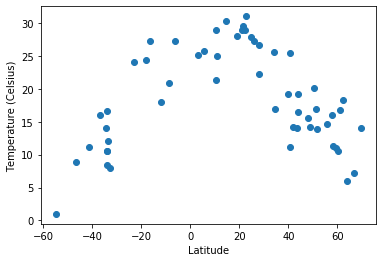

<Figure size 432x288 with 0 Axes>

In [97]:
x_values = city_df["latitude"]
y_values = city_df["temp"]
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature (Celsius)')
plt.show()
plt.savefig("../lat_temp.png")

## Latitude vs. Humidity Plot

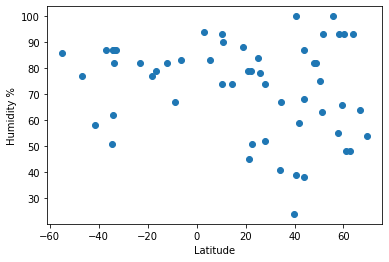

<Figure size 432x288 with 0 Axes>

In [98]:
x_values = city_df["latitude"]
y_values = city_df["humidity"]
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()
plt.savefig("../lat_humidity.png")

## Latitude vs. Cloudiness Plot

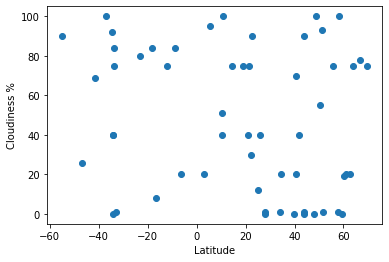

In [51]:
x_values = city_df["latitude"]
y_values = city_df["cloudiness"]
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.show()


## Latitude vs. Wind Speed Plot

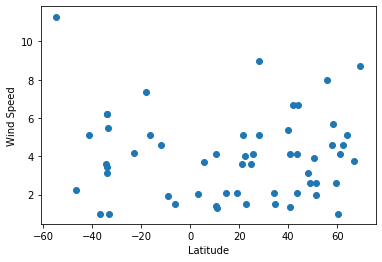

In [50]:
x_values = city_df["latitude"]
y_values = city_df["wind speed"]
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

In [93]:
n_df = city_df[city_df["latitude"] > 0]
s_df = city_df[city_df["latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

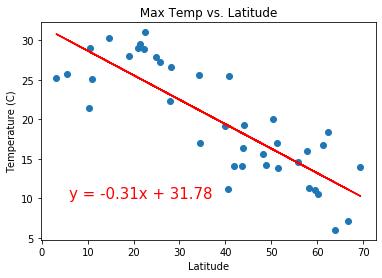

<Figure size 432x288 with 0 Axes>

In [99]:
x_values = n_df["latitude"]
y_values = n_df["temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.title(" Max Temp vs. Latitude ")
plt.show()
plt.savefig("../NorthHem_lat_temp.png")

# this graph shows what we would expect- as we get farther away from the equator the temp decreases

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

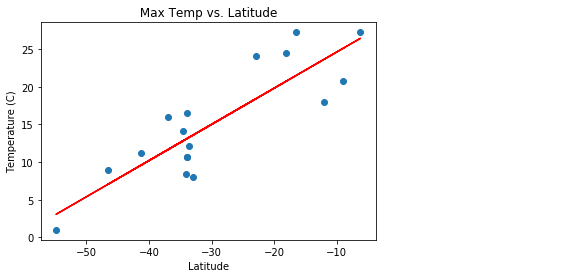

In [90]:
x_values = s_df["latitude"]
y_values = s_df["temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.title(" Max Temp vs. Latitude ")
plt.show()



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

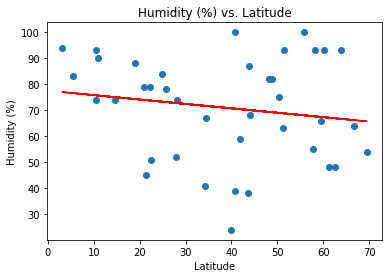

In [70]:
x_values = n_df["latitude"]
y_values = n_df["humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Humidity (%) vs. Latitude")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

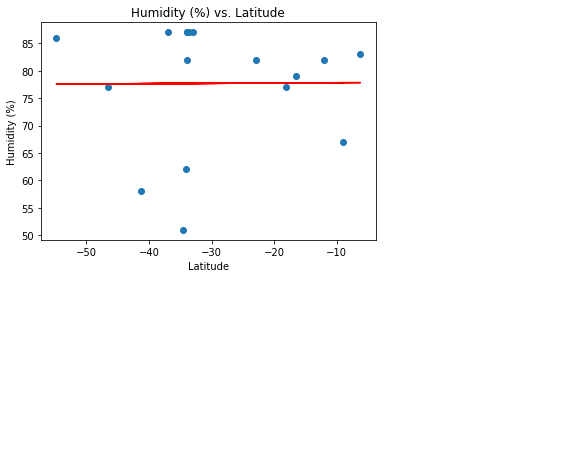

In [71]:
x_values = s_df["latitude"]
y_values = s_df["humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Humidity (%) vs. Latitude")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

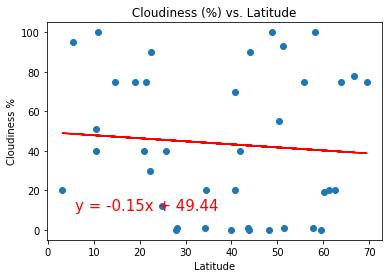

<Figure size 432x288 with 0 Axes>

In [100]:
x_values = n_df["latitude"]
y_values = n_df["cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title(" Cloudiness (%) vs. Latitude ")
plt.show()
plt.savefig("../NorthHem_lat_cloud.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

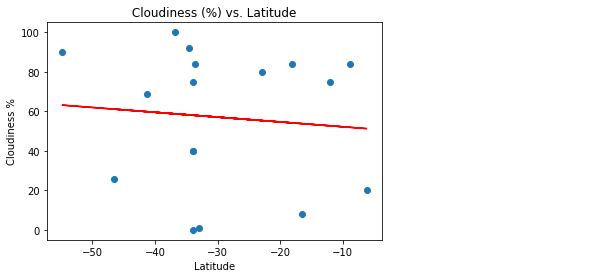

In [79]:
x_values = s_df["latitude"]
y_values = s_df["cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title(" Cloudiness (%) vs. Latitude ")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

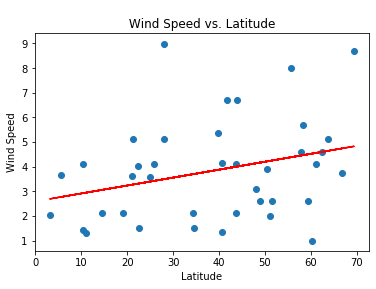

In [81]:
x_values = n_df["latitude"]
y_values = n_df["wind speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(" Wind Speed vs. Latitude ")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

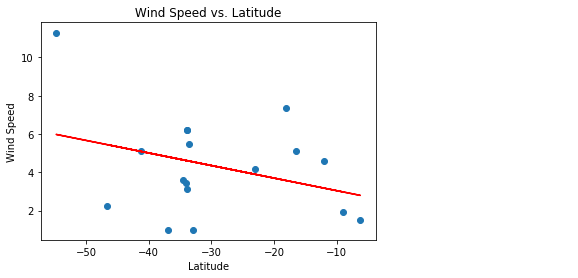

In [82]:
x_values = s_df["latitude"]
y_values = s_df["wind speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(" Wind Speed vs. Latitude ")
plt.show()